### BUSINESS UNDERSTANDING 

* Telecom business is interested in reducing how much money is lost because of customers who don't stick around for a very long time. Their main question is are there any predictable patterns here? So as they can  be aware of the cause of churning and have preventive measures to retain them.



 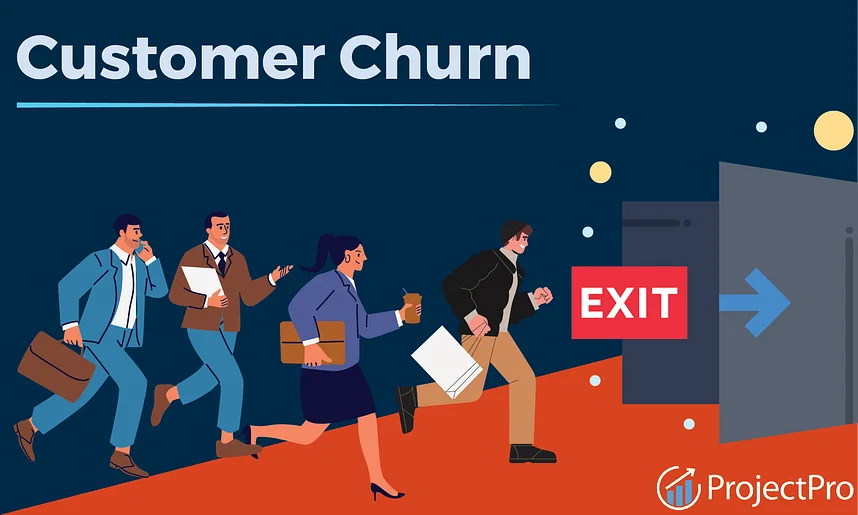



##### Business overview

#### The objective was to build a classifier to determine if a customer would ‘soon’ leave SyriaTel, and to determine if there were predictable patterns.

##### 1.To identify features of the dataset that are primary determinants of customer churn and to what extent?
##### 2. To identify ways that can reduce customer churning and how can SyriaTel implement cost-effective solutions
##### 3.To create predictive,supervised models that can predict churn##### 2.To create predictive,supervised models that can predict churn

___

#### Data understanding

##### importing necessary libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate,cross_val_predict

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report




In [18]:
#The relative path to our dataset
path="C:\\Users\\HP\\Documents\\PROJECT 3\\bigml_59c28831336c6604c800002a (1).csv"

In [19]:
# Loading the dataset and getting the top 5
data= pd.read_csv(path)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
#information in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [21]:
#The shape of our data frame
data.shape

(3333, 21)

In [22]:
#describing our data
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Column Description

* state, string. 2-letter code of the US state of customer residence
* account_length, numerical. Number of months the customer has been with the current telco provider
* area_code, string="area_code_AAA" where AAA = 3 digit area code.
* international_plan, (yes/no). The customer has international plan.* 
* voice_mail_plan, (yes/no). The customer has voice mail plan.
* number_vmail_messages, numerical. Number of voice-mail messages.
* tvoice_mail_plan, (yes/no). The customer has voice mail plan.
* otal_day_minutes, numerical. Total minutes of day calls.
* total_day_calls, numerical. Total minutes of day calls.
* total_day_charge, numerical. Total charge of day calls.
* total_eve_minutes, numerical. Total minutes of evening calls.
* total_eve_calls, numerical. Total number of evening calls.
* total_eve_charge, numerical. Total charge of evening calls.
* total_night_minutes, numerical. Total minutes of night calls.
* total_night_calls, numerical. Total number of night calls.
* total_night_charge, numerical. Total charge of night calls.
* total_intl_minutes, numerical. Total minutes of international calls.
* total_intl_calls, numerical. Total number of international calls.
* total_intl_charge, numerical. Total charge of international calls

In [23]:
#a function to describe our columns
def describe_columns(self):
    print(self.columns)
    print(self.dtypes)
    print(self.shape)
    print(self.info())

    print(self.describe())
    
    
    

In [24]:
describe_columns(data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night 

### DATA PREPARATION

#### Explanatory Data Analysis

In [25]:
#to find the count of missing and duplicated values
def data_describe(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"Number of missing values :{missing_values}\nNumber of duplicated:{duplicated_values}")
data_describe(data)  

Number of missing values :0
Number of duplicated:0


* There are no missing values and duplicated values in the dataset.The data set is now clean and ready for analysis

In [26]:
# inspecting the values of the coumn in the dataset
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* It is interesting to see that there are only 3 area_codes. It might be worth investigating whether a particular area code has higher churn than another or if it would be safe to simply drop area code. Also, area code would actually be more of a categorical feature rather than an int feature so we will change this data type.
* Since churn  (target) is a binary feature, we will replace churn with a label (0 or 1).

* Phone number is customer number feature for the client and has no meningful essence o we can drop the column
* We can see that columns international_plan and voice_mail_plan are binary features with yes/no values - we might want to change these types later to booleans or 1/0's.
* All minutes, calls and charges columns have reasonable values and nothing stands out as unusual at this stage.
* All states look normal, as expected.




Phone number is customer number feature for the client and has no meningful essence o we can drop the column as well as state

In [27]:
#ropping phone number and state columns
data.drop(["phone number","state"],axis=1,inplace=True)

* # Univariate Analysis

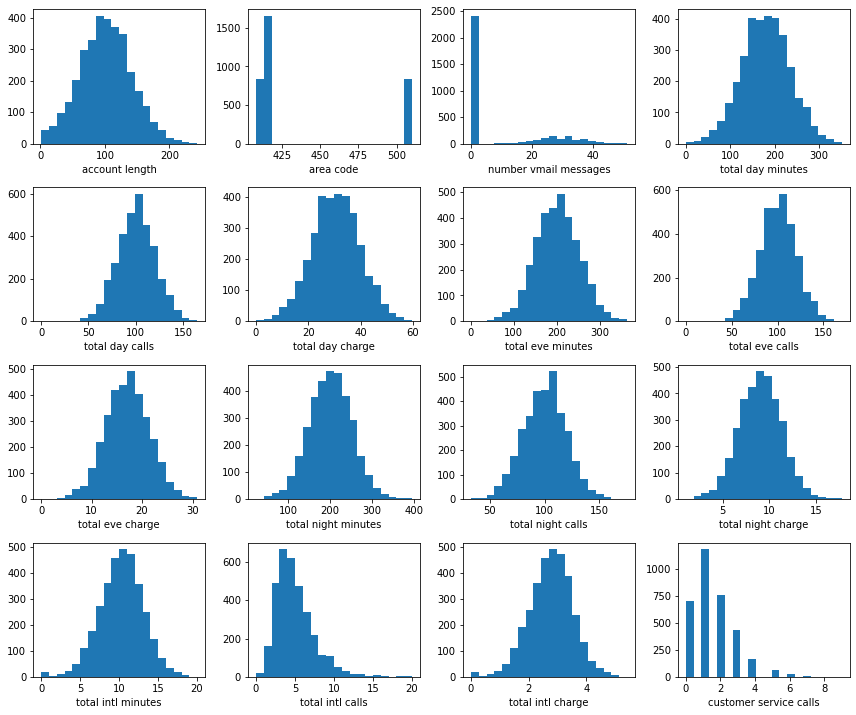

In [28]:
# Plotting histograms for numeric features
plt.figure(figsize=(12, 10))
for i, feature in enumerate(data.select_dtypes("number"), 1):
    plt.subplot(4, 4, i)
    plt.hist(data[feature], bins=20)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

* most columns produce a normal distribution curve except for the few i.e no. of voicemail,customer service which are skewed positively

####  Exploring the Target(Churn)

In [29]:
# Finding the values pf churn column
churn_explore = data["churn"].value_counts()
churn_rate = churn_explore[1] / churn_explore.sum() * 100

print("Churn Distribution:")
print(churn_explore)
print("\nChurn Rate: {:.2f}%".format(churn_rate))

Churn Distribution:
False    2850
True      483
Name: churn, dtype: int64

Churn Rate: 14.49%


* True will mean the customer was churned while False will mean the customer was not churned. the churn rate lies at 14%

In [30]:
# lets replace True with 1 and False 0
data.churn.replace((True,False),(1,0),inplace=True)

In [31]:
#converting the international plan and voicemail plan to Binary
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

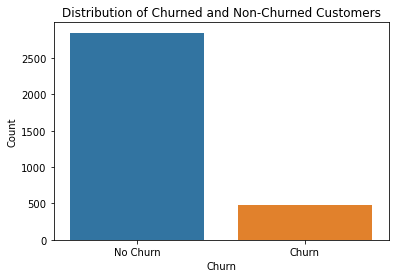

In [32]:

# Create a bar plot of churned vs. non-churned customers
sns.countplot(x="churn", data=data)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.title("Distribution of Churned and Non-Churned Customers")
plt.show()

##### Bivariate Analysis


1. Area code

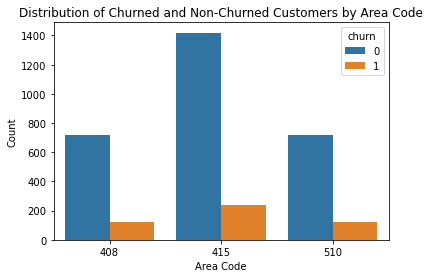

In [33]:
 # grouping area code and churn
grouped_data=data.groupby(["area code","churn"]).mean()
# Create a bar plot of churned vs. non-churned customers, grouped by area code
sns.countplot(x="area code", hue="churn", data=data)

# Add labels and titles to the plot
plt.xlabel("Area Code")
plt.ylabel("Count")
plt.title("Distribution of Churned and Non-Churned Customers by Area Code")

# Show the plot
plt.show()

* the plot suggests that there may be a relationship between customer location and churn rate, with area code 415 having a higher churn rate compared to the other area codes.After further investigation, it is clear that the 415 area code has more customers than the 408 or 510 area codes. However, all three area codes have around the same churn rate. Since there is no clear pattern, I believe it is safe to delete the area code column from the dataset as well.

2.Customer services

In [34]:
cust_serv_calls = (data.groupby(['customer service calls'])['churn'].mean())
cust_serv_calls

customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: churn, dtype: float64

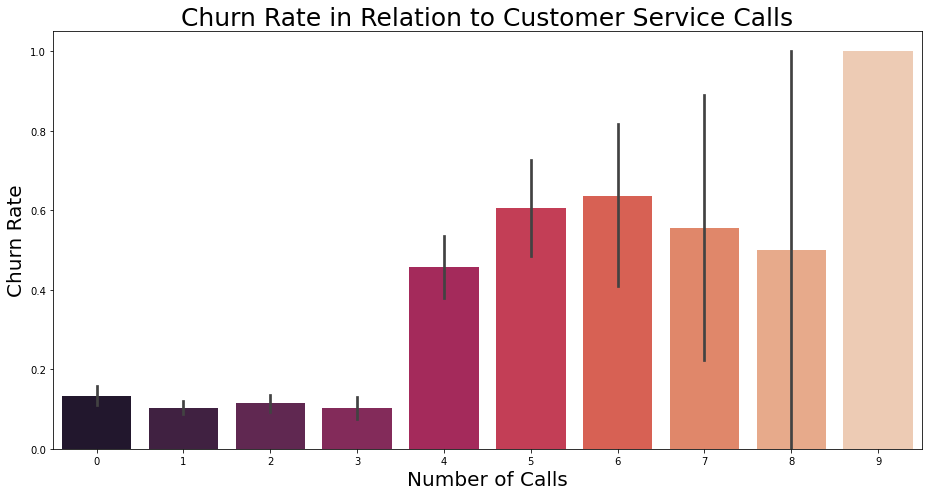

In [35]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data=data, x=data['customer service calls'], y='churn',palette="rocket", ax = ax)
plt.title('Churn Rate in Relation to Customer Service Calls', fontsize=25)
plt.ylabel('Churn Rate', fontsize=20)
plt.xlabel('Number of Calls', fontsize=20)
plt.tight_layout();

* it appears that there is a strong relationship between the number of times a customer calls customer service and their likelihood to churn. Specifically, the chart shows that when a customer has to call customer service four times, the likelihood of churn significantly increases

* By addressing customer issues in a timely and effective manner, businesses may be able to reduce customer churn and improve overall customer satisfaction.

3. international plan

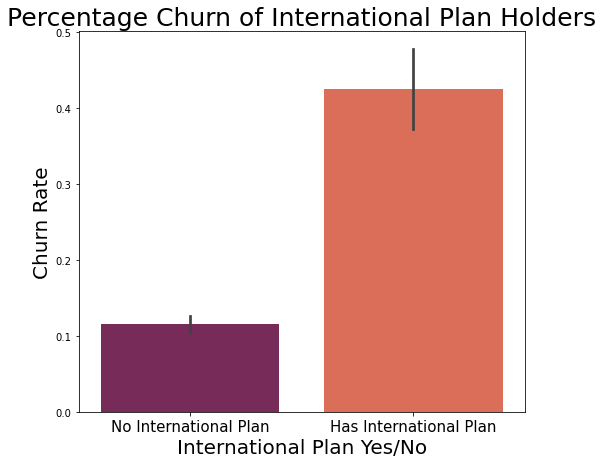

In [36]:
fig, ax = plt.subplots(figsize=(8,7))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="rocket", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout;

* Obervation:From the graph above majority of the customers holding international plan are churning because the services of SyriaTel are not fully satisfying them.
we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning.

4. account length

In [37]:
customer_acc_length =(data.groupby(['account length'])['churn'].mean())
customer_acc_length


account length
1      0.125
2      1.000
3      0.000
4      0.000
5      0.000
       ...  
221    0.000
224    0.500
225    0.500
232    0.000
243    0.000
Name: churn, Length: 212, dtype: float64

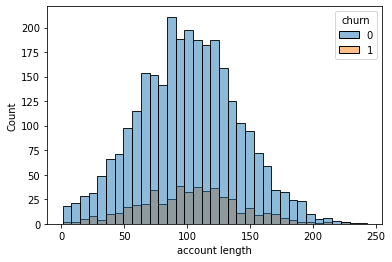

In [38]:
ax = sns.histplot(x="account length", hue="churn", data=data)

* The distribution for churned customers has a longer tail on the right side of the plot, this may indicate that there are a few customers with extremely long account lengths that are more likely to churn.But majority with the high account length are less to churn.Syria tel should work on retaining the customers with highest account length than the one with low account length.

* # Correlations

In [39]:
#finding the correlation between churn and other features
data.corr().churn.sort_values(ascending=True)

voice mail plan          -0.102148
number vmail messages    -0.089728
total intl calls         -0.052844
total night calls         0.006141
area code                 0.006174
total eve calls           0.009233
account length            0.016541
total day calls           0.018459
total night minutes       0.035493
total night charge        0.035496
total intl minutes        0.068239
total intl charge         0.068259
total eve charge          0.092786
total eve minutes         0.092796
total day charge          0.205151
total day minutes         0.205151
customer service calls    0.208750
international plan        0.259852
churn                     1.000000
Name: churn, dtype: float64

In [40]:
#plot correlation heat map a matrix for all the dataset
data_correlation = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# convert all features that have a correlation to price of more than 0.3
data_correlation

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.00,-0.01,0.02,0.00,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
area code,-0.01,1.00,0.05,-0.00,-0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.02,-0.02,-0.02,0.03,0.01
international plan,0.02,0.05,1.00,0.01,0.01,0.05,0.00,0.05,0.02,0.01,0.02,-0.03,0.01,-0.03,0.05,0.02,0.05,-0.02,0.26
voice mail plan,0.00,-0.00,0.01,1.00,0.96,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.02,-0.10
number vmail messages,-0.00,-0.00,0.01,0.96,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
total day minutes,0.01,-0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total day calls,0.04,-0.01,0.00,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
total day charge,0.01,-0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
total eve minutes,-0.01,0.00,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
total eve calls,0.02,-0.01,0.01,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01


* You can see here that all *_minutes and *_charge features are perfectly correlated (r = 1). This is to be expected since charge is usually based on minutes. For this reason, we may not need to include both the charge and minutes columns, but rather choose just one. We might also choose to aggregate all the day/eve/night columns into one 'total' column. As mentioned earlier, for a first simple model, we will leave the features as is, but for later iterations we might choose to aggregate and drop these.

 

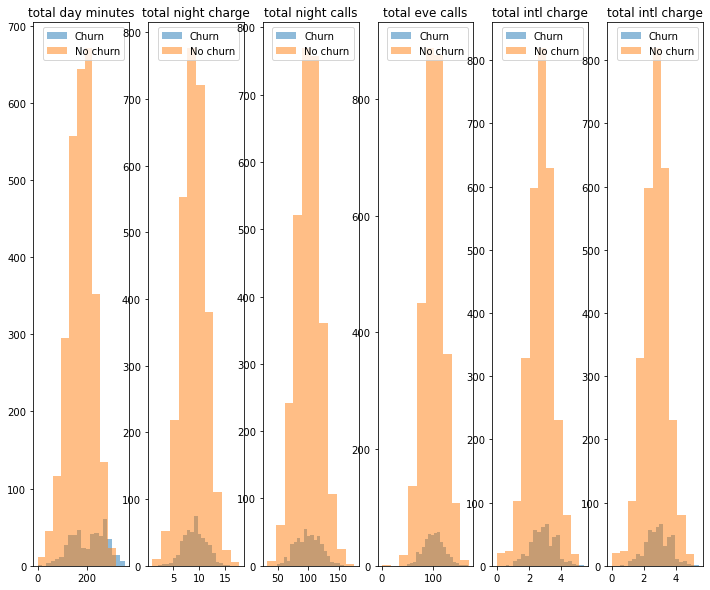

In [41]:
# Create a histogram for each numerical column, grouped by the churn status
import matplotlib.pyplot as plt

# select numeric columns from the data
num_cols=["total day minutes","total night charge","total night calls","total eve calls","total intl charge","total intl charge"]
# create subplots with one row and len(num_cols) columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 10))

# plot histogram for each numeric column
for i, col in enumerate(num_cols):
    data_churn = data[data["churn"] == 1][col]
    data_no_churn = data[data["churn"] == 0][col]
    axes[i].hist(data_churn, alpha=0.5, label="Churn", bins=20)
    axes[i].hist(data_no_churn, alpha=0.5, label="No churn", bins=10)
    axes[i].set_title(col)
    axes[i].legend()

# display the plot

plt.show()

* The histograms suggest that the "total day minutes", "total night charge", "total intl minutes", and "total intl calls" features may be strong predictors of churn, as there is a clear difference in their distributions between churned and non-churned customers. The "total night calls" and "total day calls" features may also be somewhat predictive of churn, although the differences in their distributions between the two groups are less pronounced.

categorical


* #### Outliers

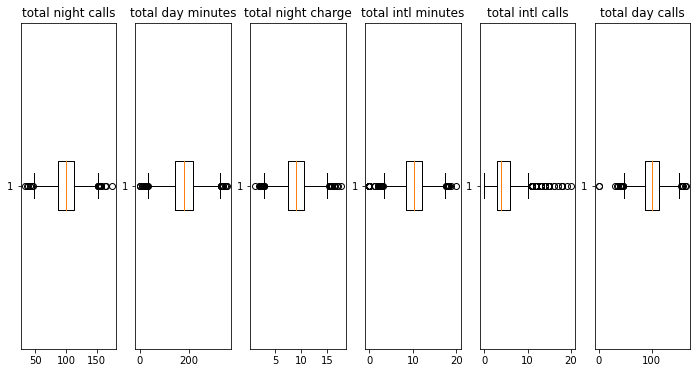

In [42]:
# Select the columns that contain numerical data
num_cols = ["total night calls", "total day minutes", "total night charge","total intl minutes","total intl calls","total day calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(data[col], vert=False)
    axes[i].set_title(col)

*  looking at outliers this indicate that some customers have significantly higher charges compared to the majority of customers. This could be due to factors such as premium services, overage charges, or other factors that increase the customer's bill.Here  outliers are genuine as every customer has different need and will not affect the final results
so i will not drop them.

### MODELING

modelling is an important tool in machine learning and data science that can be used for prediction, understanding, decision-making, optimization, and automation of data. By creating models that capture key variables and relationships in a process, we can gain valuable insights and make data-driven decisions that can improve Syriatel company.

#### 1.Baseline model (Logistic Regression)

In [43]:
# Identify our target varriable(churn)in the Y_axis and other features as X_axis
X=data.drop(["churn"],axis=1)
y=data["churn"]

In [44]:
# Splitting the dataset into training for modeling and test for validation or prediction.A test size of 20% with a random state of 42
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
#checking for imbalance in the dataset
if (len(y_train) / len(y_test) > 2 or len(y_test) / len(y_train) > 2):
    print("Imbalanced Data")
    print("Train Data : ", len(y_train))
    print("Test Data : ", len(y_test))
    
    

Imbalanced Data
Train Data :  2666
Test Data :  667


There seems to be an imbalance in the dataset and we may consider using SMOTE to balance the dataset of the other models

In [46]:
# Create and insantiating the SMOTE object
smote = SMOTE()

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [47]:
#idea behind scaling is to transform the features of a dataset so that they have the same scale or range, which can help to improve the performance of the machine learning algorithm
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_resampled)
X_test_scaled = scale.transform(X_test)

In [48]:
# # Logistic Regression
base_model = LogisticRegression(random_state=42)

# #fitting the model
base_model.fit(X_train_scaled, y_train_resampled)

#  # Predict Test Set
y_base_pred_test= base_model.predict(X_test_scaled)






In [49]:
#calculate logistic regression score
lr_score = base_model.score(X_test_scaled, y_test)
lr_score



0.7391304347826086

In [50]:
#cross validation of the logistic regression model
base_cv = cross_val_score(base_model, X_train_scaled, y_train_resampled)
base_cv





array([0.72210066, 0.77352298, 0.75273523, 0.7524644 , 0.76013143])

In [51]:
#classification report on the testing data
base_report = classification_report(y_test, y_base_pred_test)
print(base_report)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       566
           1       0.33      0.72      0.46       101

    accuracy                           0.74       667
   macro avg       0.64      0.73      0.64       667
weighted avg       0.85      0.74      0.77       667



* Observing our Dataset it will be of much importance and advisable to over look the Recall scores.A higher Recall will be of benefit to SyriaTel company as it will be able to classify the false positive(incorrectly identifying a customer as likely to leave ) may be less costly as a Syriatel can take steps to retain the customer.Recall will therefore be an evaluation metric for this project

The model has an accuracy of 74% on the test data,with a  recall of 72% .There is need to build other model cassifiers

 #### Model 2.Decision Tree

In [52]:
# we plit our data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#instanciate our desicion tree model and fit to the resambled trains
Decision_tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=5,random_state=42)
Decision_tree.fit(X_train_scaled,y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [53]:
# Predicting the Test on the decision tree
y_pred = Decision_tree.predict(X_test_scaled)
#cross validation on the model
model_cv = cross_val_score(Decision_tree, X_train_scaled, y_train_resampled)
# Printing the confusion matrix
print(confusion_matrix(y_test, y_pred))
# Printing the classification report
print(classification_report(y_test, y_pred))


[[533  33]
 [ 26  75]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       566
           1       0.69      0.74      0.72       101

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.91      0.91      0.91       667



The model has an 91% accuracy higher than the baseline with a recall of 74% which is much better  perfoming than our baseline model.But we will have to build a more complex model and observe its performance.I will build a Random forest

#### Model 3. Random forest

In [54]:
#initiating a random forest classifier

clf = RandomForestClassifier(n_estimators=10, random_state=42,max_depth=5)
#fitting the classifier
clf.fit(X_train_scaled, y_train_resampled)
#predicting the outcome
y_pred = clf.predict(X_test_scaled)
#calculating the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
#calculating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
#calculating the classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)
#calculating the precision
precision = metrics.precision_score(y_test, y_pred)
print(precision)
#calculating the recall
recall = metrics.recall_score(y_test, y_pred)
print(recall)
#calculating the f1 score
f1 = metrics.f1_score(y_test, y_pred)
print(f1)



0.9130434782608695
[[536  30]
 [ 28  73]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.71      0.72      0.72       101

    accuracy                           0.91       667
   macro avg       0.83      0.83      0.83       667
weighted avg       0.91      0.91      0.91       667

0.7087378640776699
0.7227722772277227
0.7156862745098039


* The model has  an accuracy of 91% performing better than decision tree with a  higher Recall of 72% and therefore it can be used as  a good model for pedicting unseen data too.But i will have do hyper parameter tuning to the Desicion tree and Random forest to find out how they will perform.

#### feature importance on the final model

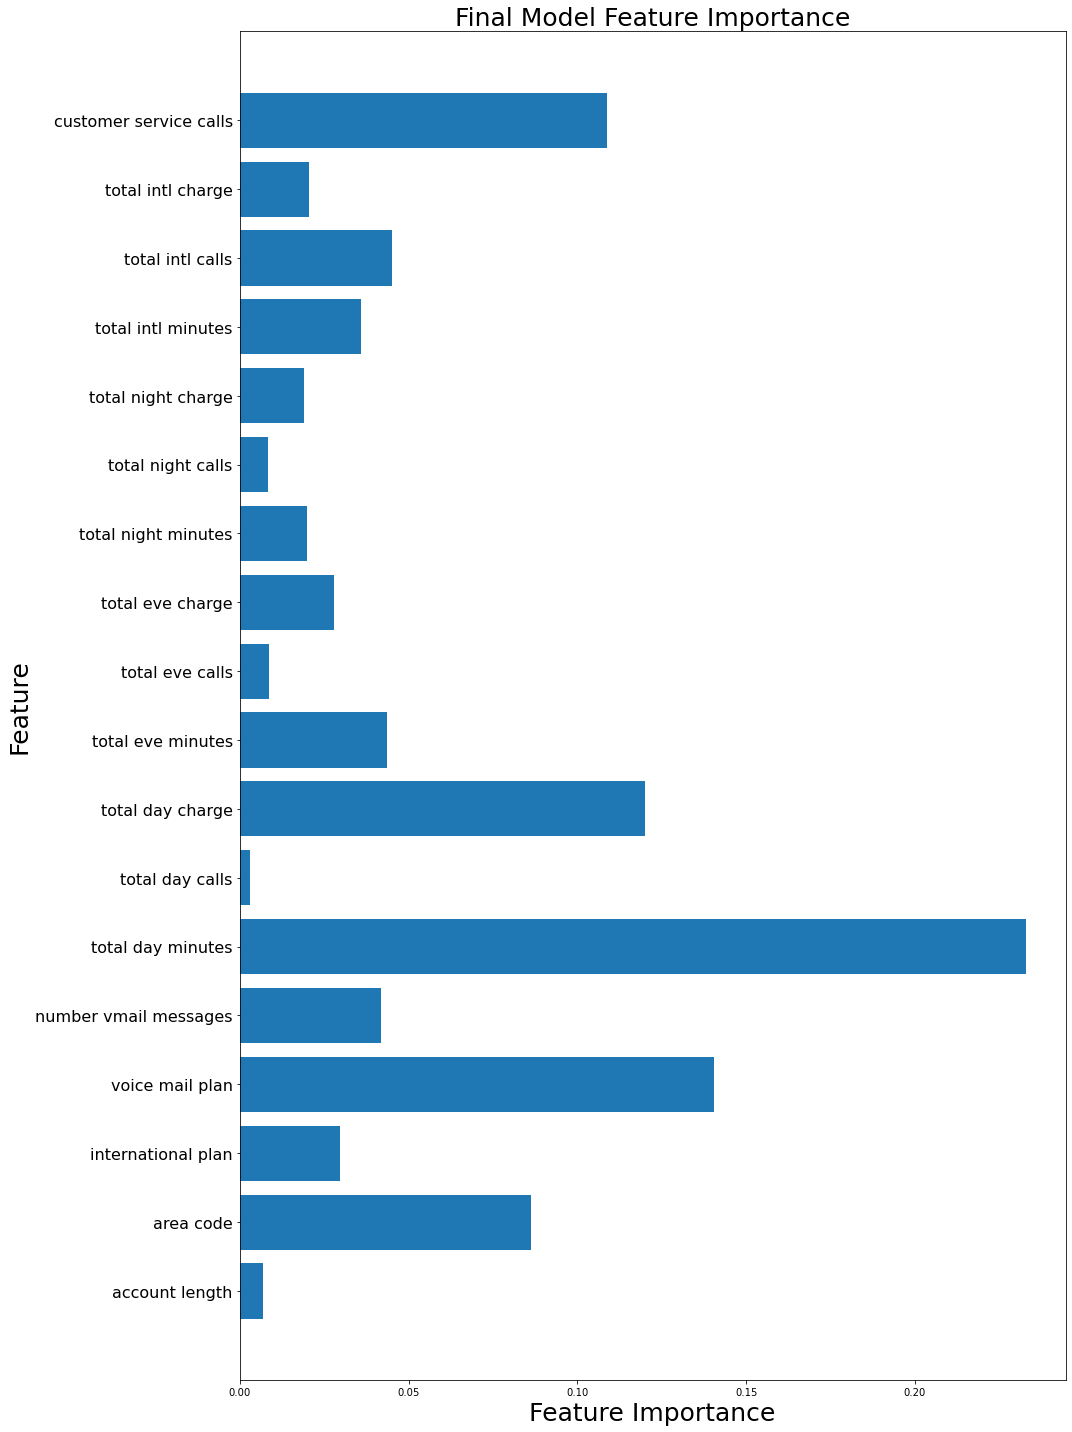

In [55]:
def plot_features_importances(model):
    n_features = X_test.shape[1]
    plt.figure(figsize=(15,20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns.values, fontsize = 16)
    plt.xlabel('Feature Importance', fontsize = 25)
    plt.ylabel('Feature', fontsize = 25)
    plt.title('Final Model Feature Importance', fontsize = 25)
    plt.tight_layout()
    
plot_features_importances(clf)

From the graph,there are features that carry much weight compared to others  i.e
* customer service calls
* Total day minutes
* Total day charge

#### 4. comparing hyper parameters tuning with GridSearch CV for both Desicion Tree and RandomForest

In [56]:

# Define the hyperparameter grids for the decision tree and random forest models
dt_param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV objects for the decision tree and random forest models
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)

# Fit the GridSearchCV objects to the training data
dt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best scores for the models
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Train the decision tree and random forest models with the best hyperparameters on the entire training dataset
dt_clf = DecisionTreeClassifier(**dt_best_params)
rf_clf = RandomForestClassifier(**rf_best_params)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions on the test data and evaluate the performance of the models using accuracy
dt_y_pred = dt_clf.predict(X_test)
rf_y_pred = rf_clf.predict(X_test)
dt_recall = recall_score(y_test, dt_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

# Compare the performance of the decision tree and random forest models based on recall and select the best one
if dt_recall > rf_recall:
    print('Decision tree is better, with recall:', dt_recall)
else:
    print('Random forest is better, with recall:', rf_recall)

Random forest is better, with recall: 0.7128712871287128


* Having to tune our Desicion tree and RandomForest.Random forest improves the Recall of our model to 71% .it means that the model correctly identified 71% of the churn test dataset.  The model is good at identifying positive cases which is now better in prediction of our unseen data due to generalization

#### Evaluation

* All the objectives that were set were all met.features such as customer servive calls,international plan and total day charge were among the major determinants of customers churning.
* Customers who churned were usually customers who churned frequently.
* to reduce the customer churning rate,Syria tel should target on:  
     * addressing customer issues in a timely and effective manner
     * increasing customer loyalty by giving incentive,discounts and promotion to their loyal customer
     * increasing customer satisfaction by offering discounts and promotions

----

* Recall was used as the metric in the project.In a churn situation, where the goal is to identify customers who are likely to leave Syriatel company , it is generally more important to have high recall than high precision.Therefore, a model with high recall (i.e., identifying most of the customers who are likely to churn) is generally preferred in a churn situation, even if it means sacrificing some precision (i.e., including some customers who are not actually at risk of churning).It gives Syriatel an opportunity to offer a preventintive measure for retaining its customers

* To achieve high recall, the model should be able to identify the customers who are at risk of churning.After balancing our Data Baseline gave a recall of 72%. Desicion tree improved from baseline to a 74% recall making it better for predicting unseen data.Random forest was my last model with a slightly lower recall of 72% but after hyperparemeter tuning,it gave a recall 0f 71% and a 90% accuracy which now became the best model for prediction of unseen data

### Conclusion

* Logistic Regression
Recall score(test) = 72%

* Decision Tree
Recall score(test) = 74%

* Random Forest
Recall score (test)= 72%

* Random Forest with Gridsearch CV
Recall score (test)=71%.This became the major model for predicting churn rate



### RECOMENDATION

* Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.
* Given that over 42% of international plan holders churn, further investigation into retention efforts for these customers might be a worthwhile effort.

* SyriaTel should target on addressing customer issues in a timely and effective manner, as many calls made to them through the customer service led to them churning so as  to reduce customer churn and improve overall customer satisfaction.
